# Lesson 01: Basic channel profiles

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 13/09/2021*

This lesson explores the shape of channel profiles. A channel profile is the plot of the elevation of a river versus its distance downstream. We sometimes call this a channel longitudinal profile or a "long profile".

In this lesson we will:
* Look at some general properties of channels: drainage area and slope, drainage area and length, and length and slope.
* Derive a basic equation for an "ideal" channel longitudinal profile. 
* We have some interactive plots so you can play with some typical parameters to see how they affect river profiles.

## Before we do anything we need to do some python stuff

To get this all to run you should go to the menus above ↑, click on **kernal**, and then do **restart and run all**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

## Basic properties of channel profiles

Imagine yourself in a nice mountain valley walking along a stream. You start quite low in the valley. The stream is nice and wide. As you go upstream the river gets smaller. This is because it is draining less area. In addition, the stream will probably change its gradient. Near the mountain tops, channels tend to get steeper. Because channels tend to get steeper as we move along them, we can call their profiles concave. There are exceptions, but the general trend of rivers is to get steeper as you go upstream. 

If you run the code below you will see a profile of a channel in an area near Xi'an, China. 

<Figure size 432x288 with 0 Axes>

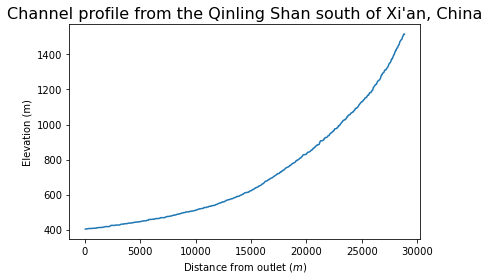

In [21]:
# Pick a basin here. You can choose an integer between 0 and 12. Each one is a river basin. 
# Basin 3 has a very nice concave channel (not all of the channels are concave)
basin_number = 3

df = pd.read_csv("Xian_chi_data_map.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf.set_crs(epsg=4326)

# First lets isolate just one of these basins.
gdf_b1 = gdf[(gdf['basin_key'] == basin_number)]
min_source = np.amin(gdf_b1.source_key)
gdf_b2 = gdf_b1[(gdf_b1['source_key'] == min_source)]

# Now make channel profile plots
z = gdf_b2.elevation
x_locs = gdf_b2.flow_distance

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1) = plt.subplots(1, 1)
#ax1.scatter(x_locs, z,s = 1,marker='o')
plt.plot(x_locs,z)

ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("Elevation (m)")
plt.title("Channel profile from the Qinling Shan south of Xi'an, China",fontsize=16)


plt.tight_layout()

### Area - gradient relationship

So we have a channel that is concave. So the headwaters are steep. Can we compare different points in the channel to determine their relative steepeness?

One way to do this is to control for how much water is in the channel (bigger rivers tend to have lower gradients). But to measure this you need to put instruments in the river. This is difficult, so we frequently use drainage area as a proxy for the amount of water in the channel (we measure the water in the channel as discharge, the volume of water passing though a point per time). 

In the 1950's and 60's people started measuring how steep rivers were as a function of their drainage area (there is a classic 1957 paper by Hack on this topic). In 1962 Marie Morisawa realised that the relasionship between drainage area and gradient followed a power law. 

The power law can be described by:

$S = k_s A^{-\theta}$

Some authors now refer to this as "Flint's Law", because of a 1974 paper by Flint where he went into a lot of details about this relationship, but it really should be called "Morisawa's law" since she was the first one to notice it. 

The symbols above are the ones used in loads of papers. $S$ is slope (or gradient), $A$ is drainage area, $k_s$ is something called the "steepness index" and $\theta$ is called the concavity index. 

We can look at how these affect potential slopes with a bit of python. You don't need to worry too much about what this code is doing, but you should read the text and look at the plots. 

First we make a series of drainage areas:

In [24]:
logA = np.arange(3,6.01,0.25)
A = 10**logA
print(logA,A)

[3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ] [   1000.            1778.27941004    3162.27766017    5623.4132519
   10000.           17782.79410039   31622.77660168   56234.13251903
  100000.          177827.94100389  316227.76601684  562341.32519035
 1000000.        ]


Now I plot the slopes and areas. You should play with this by changing the $k_s$ and $\theta$ parameters to see what happens. Remember these are just some numbers used to fit Morisawa's Law. 

Note how the plot has logarithmic spacing on the axes. We use logarithmic spacing when our data covers a big range of values. 

For some indication: 
* $k_s$ usually varies between 1 and 1000 (when $\theta$ is 0.45).
* $\theta$ usually varies between 0.3 and 0.65

Text(0.5, 1.0, 'Relationship between gradient and drainge area for a hypothetical channel')

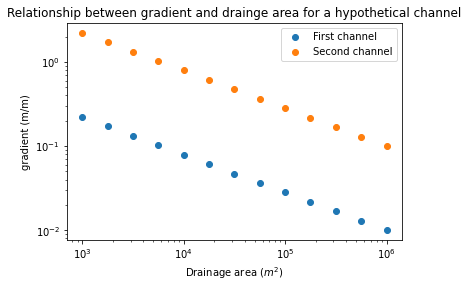

In [29]:
# Try changing the values of the k and theta parameters
k_s1 = 5
theta1 = 0.45
S1 = k_s1*A**(-theta1)

k_s2 = 50
theta2 = 0.45
S2 = k_s2*A**(-theta2)

plt.scatter(A,S1)
plt.scatter(A,S2)
plt.legend(['First channel','Second channel'])
plt.xlabel("Drainage area ($m^2$)")
plt.ylabel("gradient (m/m)")
plt.yscale('log')
plt.xscale('log')
plt.title('Relationship between gradient and drainge area for a hypothetical channel')

__Task:__ Change the values of $k_s$ and $\theta$ in the plots above to see how they affect the relationship between drainage area and gradient. For a reference, a gradient of 0.1 is **very** steep for a river. You will probably transision to channels dominated by debris flows at this gradient. 

### Longitudinal profiles

Another observation of channel profiles was made by Hack, where he noted that drainage area and stream length could be related by a power law. This is (rightfully) called Hack's law. He wrote this as:

$L = c A^h$

where $L$ is the length of a basin and $c$ and $h$ are some empirical constants.  

Drainage area will get bigger as you go downstream. But this is a little bit annoying for my purposes so I am going to write this as a distance upstream from an outlet. 

$A = (x_0 - x)^b$

where $x_0$ is the distance from the source to the outlet (basically the same as $L$ but I have chosen a specific outlet) and $b = 1/h$. 

We can plug this equation into Morisawa's law to get:

$S = k_s (x_0 - x)^{-b \theta}$

Slope, however, is the same as the derivative of elevation, $dz/dx$. I will not bore you with the details, but this a differential equation that can be solved (remember EMP2?). The solution is:

$z = \frac{k_s \left(x (x_0-x)^{-b \theta }-x_0 (x_0-x)^{-b \theta }+x_0^{1-b \theta }\right)}{1-b \theta }$

We can plot this using python. First we define a function to get the elevations (this is just a python version of the equation above). 

In [30]:
def channel_profile(x,ks,theta,b,x0):
    z = []
    term1 = 1-b*theta
    term2 = -b*theta
    for xi in x:
        this_z = ks*( xi*(x0-xi)**term2 - x0*(x0-xi)**term2+ x0**(term1))/(term1)
        z.append(this_z)
    return np.asarray(z)

Now, we can plot. Try manipulating the parameters. Typical ranges of $\theta$ and $k_s$ are listed above. 

* $b$ will range from around 1.8 to a little over 2
* $x_0$ is the length of the channel, so anywhere from a few km (you input this in m) to 50 km. 

Text(0, 0.5, 'elevation (m)')

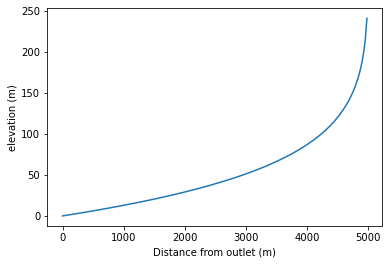

In [31]:
# x0 needs to me in metres!!
x0 = 5000
ks = 25
theta = 0.45
b = 2
x = np.arange(0,x0,25)
z = channel_profile(x,ks,theta,b,x0)


plt.plot(x,z)
plt.xlabel("Distance from outlet (m)")
plt.ylabel("elevation (m)")
plt.title("A channel profile based on ")

#print(z)

Okay, so by now you should have a basic understanding of what channel long profiles look like!

This is all rather simplified. The main thing we have missed out on when considering slope and the long profile is that river drainage area, is not smoothly increasing. At tributary junctions you get a jump in drainage area. So typical river profiles are not quite as smooth as the plot above. But this is not far off a well-behaved river. And by well behaved I mean that it is flowing over the same type of rocks, and there erosion rate has been steady (that is, not varying) for a really long time. 

__Task:__ Change the values of $k_s$, $b$, $x_0$, and $\theta$ in the plots above to see how they affect the channel long profile.

## Further reading

Hack, J., 1957. Studies of longitudinal profiles in Virginia and Maryland (U.S. Geological Survey Professional Paper No. 294- B). United States Government Printing Office, Washington, D.C.

Morisawa, M., 1962. Quantitative Geomorphology of Some Watersheds in the Appalachian Plateau. Geol. Soc. Am. Bull. 73, 1025–1046. https://doi.org/10.1130/0016-7606(1962)73[1025:QGOSWI]2.0.CO;2